In [104]:
# Matt Grant 
# 9/17/2105
# Data Analysis: Capital One, Use transaction data to categorize clients

import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline 
style.use('ggplot')

#Using the transactions data attached below, write a script in 
#Python,that outputs a list of subscription IDs,their subscription 
#type (daily, monthly, yearly, one-off), and the duration of their 
#subscription.
# Subscription ID, Type , Duration 
#    3159        , Monthly, 900 days 

#Bounus
#1. Give annual revenue numbers for all years between 1966 and 2014. 
#Which years had the highest revenue growth, and highest revenue loss?


#2. Predict annual revenue for year 2015 (based on historical retention and new subscribers)

In [3]:
#Import data into pandas dataframe
data = pd.read_csv('../Data Science/CapitalOneScript/subscription_report.csv')

In [4]:
# Explore data
data.head()

,Id,Subscription ID,Amount (USD),Transaction Date
0,1235,15447,1900,01/01/1966
1,1236,30674,7280,01/01/1966
2,1237,5293,3260,01/01/1966
3,1238,33782,4060,01/02/1966
4,1239,56714,6370,01/02/1966


In [5]:
data.shape

(779999, 4)

In [6]:
# Set Transaction Date as time data type
# YYYY - MM - DD
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])

In [7]:
# Verify correct data type 
data['Transaction Date'].dtype

dtype('<M8[ns]')

In [8]:
# Look for any null values
data.isnull().sum()

Id                  0
Subscription ID     0
Amount (USD)        0
Transaction Date    0
dtype: int64

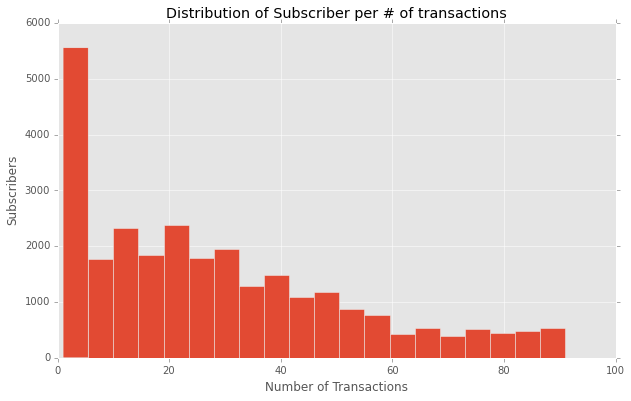

In [147]:
#Distribution of Subscriber for # of transactions(min:1 (one-off), max 91)
data['Subscription ID'].value_counts().plot(kind='hist', bins=20, )
ylabel('Subscribers')
xlabel('Number of Transactions')
title('Distribution of Subscriber per # of transactions')

In [140]:
# Sort data by 'Subscription ID' and date & re-index 
data.sort(['Subscription ID','Transaction Date'], inplace=True)
data.index = range(1,len(data) + 1)

In [141]:
#Create a column for the year in which the transaction occured 
data['Year'] = [datetime.year for datetime in data['Transaction Date']]

In [142]:
data.tail()

,Id,Subscription ID,Amount (USD),Transaction Date,Year
779995,689487,58376,6820,1992-03-01,1992
779996,705627,58376,6820,1993-03-01,1993
779997,718165,58376,6820,1994-03-01,1994
779998,727838,58376,6820,1995-03-01,1995
779999,735242,58376,6820,1996-03-01,1996


In [143]:
#Create a list of Subscription IDs  27,609 Unique IDs
IDs = [data['Subscription ID'].unique()]
print IDs, len(IDs[0])

[array([ 3159,  3160,  3164, ..., 58372, 58374, 58376])] 27609


In [144]:
IDs[0][0]

3159

In [224]:
#Code Check (Find all rows in DataFrame where 
ID = data[data['Subscription ID'] == IDs[0][3]]
ID['Transaction Date']#.iloc[0]

155   1978-08-25
156   1978-08-26
157   1978-08-27
158   1978-08-28
159   1978-08-29
160   1978-08-30
161   1978-08-31
162   1978-09-01
163   1978-09-02
164   1978-09-03
165   1978-09-04
166   1978-09-05
167   1978-09-06
168   1978-09-07
169   1978-09-08
170   1978-09-09
171   1978-09-10
172   1978-09-11
173   1978-09-12
174   1978-09-13
175   1978-09-14
176   1978-09-15
177   1978-09-16
178   1978-09-17
179   1978-09-18
180   1978-09-19
181   1978-09-20
182   1978-09-21
183   1978-09-22
184   1978-09-23
185   1978-09-24
Name: Transaction Date, dtype: datetime64[ns]

In [223]:
# Test logic  
# ex ID 3168  == one transaction 'One off'
# ex ID 3180  == 34 transaction over 12054 days == 'Yearly' 
# ex ID 3159  == 84 transaction over 2557 days == 'Monthly' 
# ex ID xxxx  == ?? transaction over ?? days == 'daily' 


IDdata = data[data['Subscription ID'] == 3165] #ID 
IDID = IDdata['Subscription ID'].iloc[0]
nrow = len(IDdata)
deltaT = IDdata['Transaction Date'].iloc[nrow-1]-IDdata['Transaction Date'].iloc[0]
duration = deltaT/nrow
#print ID

# add this to a new data frame? 
print "ID:",IDID , "Duration:", deltaT, " Number of Transactions:", nrow, " Transaction Type:",duration 

ID: 3165 Duration: 30 days 00:00:00  Number of Transactions: 31  Transaction Type: 0 days 23:13:32.903225


In [19]:
results = pd.DataFrame(columns =['Subscription ID','Duration','Type',])
results.head()

,Subscription ID,Duration,Type


In [237]:
_3160 = data.groupby(data['Subscription ID'] == 3160)
_3160

In [251]:
IDCol = [0]*27609
nrowCol = [0]*27609
deltaTcol=[0]*27609
durationCol=[0]*27609
TypeCol=[0]*27609

for item in range(27609): #27609 elements
    
    IDdata = data[data['Subscription ID'] == IDs[0][item]]
    ID = IDdata['Subscription ID'].iloc[0]#IDs[0][item] 
    nrow = IDdata.shape[0]
    
    if nrow > 1:  
        deltaT = IDdata['Transaction Date'].iloc[nrow-1] - IDdata['Transaction Date'].iloc[0]
        duration = deltaT/nrow
    else:
        deltaT = pd.to_timedelta('0 days')
        duration = pd.to_timedelta('0 days')
        tType = 'One Off'
        
    if duration > pd.to_timedelta('250 days'):
        tType = 'Yearly'
        
    elif duration >= pd.to_timedelta('27 days') and duration <= pd.to_timedelta('32 days'):
        tType = 'Monthly'                      
        
    elif duration > pd.to_timedelta('0 days') and  duration < pd.to_timedelta('2 days'):
        tType = 'Daily'
    #elif duration == pd.to_timedelta('0 days'):
    #    tType ='One Off-v2'
    

    IDCol[item] = ID
    nrowCol[item] = nrow
    deltaTcol[item]= deltaT
    durationCol[item]= duration
    TypeCol[item]= tType
    #print ID, nrow, deltaT, duration, tType     
    

print 'complete'

complete


In [253]:
len(IDCol)

27609

In [ ]:
del ID[:]
del nrow[:]
del deltaT[:]
del duration[:]
del tType[:]

In [254]:
results['Subscription ID'] = IDCol
results['Duration'] = deltaTcol
results['Type'] = TypeCol
results.head()

,Subscription ID,Duration,Type
0,3159,2557 days,Monthly
1,3160,2038 days,Monthly
2,3164,0 days,One Off
3,3165,30 days,Daily
4,3168,0 days,One Off


In [255]:
#Output to csv file
results.to_csv("CapitalOneTransactions.csv", index=False, cols=('ID','Type','Duration(Days)'))

In [116]:
# Total revenue by year in $ 
revenue_by_year = data['Amount (USD)'].groupby(data['Year']).sum()#
print revenue_by_year

Year
1966     36431250
1967     55206230
1968     68890920
1969     77045920
1970     84949330
1971     91189830
1972     95586580
1973     99383650
1974     98744820
1975    105504600
1976    104622260
1977    101857340
1978    106251790
1979    108166430
1980    108528090
1981    110106310
1982    111565530
1983    108256270
1984    104525580
1985    110577480
1986    110139420
1987    115754290
1988    109618750
1989    115033300
1990    112381870
1991     79165380
1992     62355060
1993     48719610
1994     38032150
1995     29052430
1996     22347710
1997     17567700
1998     15106790
1999     14109370
2000     13263950
2001     12343040
2002     11398870
2003     10515720
2004      9611030
2005      8762010
2006      7859160
2007      7068410
2008      6140160
2009      5344260
2010      4590540
2011      3694750
2012      2736530
2013      1778720
2014       874770
Name: Amount (USD), dtype: int64


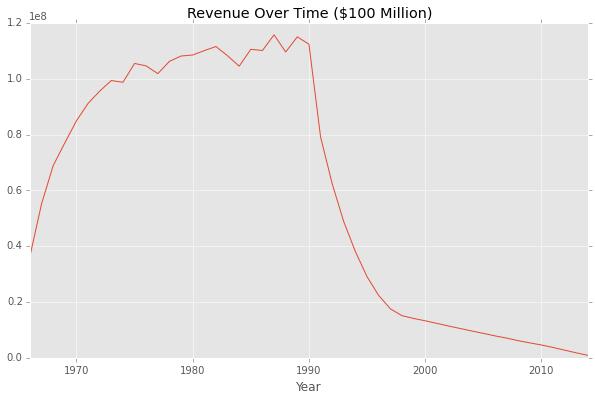

In [134]:
revenue_by_year.plot(title='Revenue Over Time ($100 Million)')
rcParams['figure.figsize'] = (10, 6)

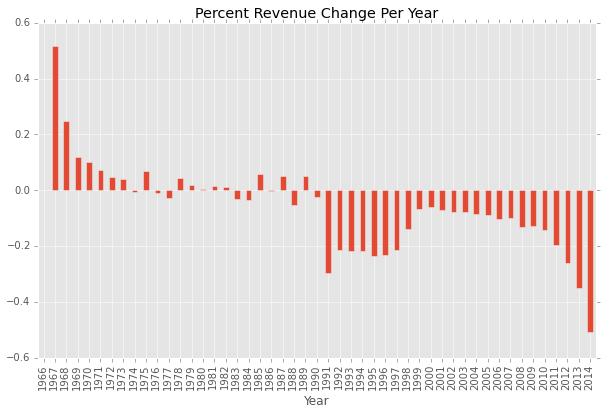

In [132]:
# Bar chart of revenue chanege per year 
revenue_by_year.pct_change().plot(kind='bar',title='Percent Revenue Change Per Year')
rcParams['figure.figsize'] = (10, 6)


In [264]:
# generates percent change and orders series from highest revenue loss to highest revenue growth
# 2014 - greatest revenue loss (-58.0%)
# 1967 - greatest revenue growth (51.5%)
print 'Greatest Revenue Growth:',revenue_by_year.pct_change().idxmax()
print 'Greatest Revenue Loss:', revenue_by_year.pct_change().idxmin()
revenue_by_year.pct_change().order()

Greatest Revenue Growth: 1967
Greatest Revenue Loss: 2014


Year
2014   -0.508203
2013   -0.350009
1991   -0.295568
2012   -0.259346
1995   -0.236109
1996   -0.230780
1994   -0.219367
1993   -0.218674
1997   -0.213893
1992   -0.212344
2011   -0.195138
2010   -0.141034
1998   -0.140082
2008   -0.131324
2009   -0.129622
2006   -0.103041
2007   -0.100615
2005   -0.088338
2004   -0.086032
2003   -0.077477
2002   -0.076494
2001   -0.069430
1999   -0.066025
2000   -0.059919
1988   -0.053005
1984   -0.034462
1983   -0.029662
1977   -0.026428
1990   -0.023049
1976   -0.008363
1974   -0.006428
1986   -0.003962
1980    0.003344
1982    0.013253
1981    0.014542
1979    0.018020
1973    0.039724
1978    0.043143
1972    0.048215
1989    0.049394
1987    0.050980
1985    0.057899
1975    0.068457
1971    0.073461
1970    0.102581
1969    0.118376
1968    0.247883
1967    0.515354
1966         NaN
Name: Amount (USD), dtype: float64

In [136]:
# Total Number of Subscribers per year
data['Subscription ID'].groupby(data['Year']).nunique()

Year
1966    1136
1967    1783
1968    2417
1969    2912
1970    3406
1971    3884
1972    4219
1973    4565
1974    4825
1975    5117
1976    5297
1977    5618
1978    5933
1979    6172
1980    6418
1981    6667
1982    6896
1983    7034
1984    7140
1985    7382
1986    7545
1987    7685
1988    7875
1989    8040
1990    8107
1991    7187
1992    6607
1993    6052
1994    5571
1995    5123
1996    4755
1997    4380
1998    4059
1999    3798
2000    3573
2001    3328
2002    3087
2003    2851
2004    2609
2005    2364
2006    2100
2007    1879
2008    1650
2009    1434
2010    1221
2011     976
2012     728
2013     479
2014     239
dtype: int64

In [137]:
# Total number of transactions per year
data['Subscription ID'].groupby(data['Year']).count()

Year
1966    10044
1967    14270
1968    18681
1969    20862
1970    23230
1971    24898
1972    26110
1973    27567
1974    27220
1975    28755
1976    27422
1977    27605
1978    28748
1979    29098
1980    29376
1981    29560
1982    29905
1983    29498
1984    28876
1985    30202
1986    29907
1987    30598
1988    29941
1989    31043
1990    30353
1991    21369
1992    16830
1993    13096
1994    10115
1995     7720
1996     5990
1997     4721
1998     4073
1999     3798
2000     3573
2001     3328
2002     3087
2003     2851
2004     2609
2005     2364
2006     2100
2007     1879
2008     1650
2009     1434
2010     1221
2011      976
2012      728
2013      479
2014      239
Name: Subscription ID, dtype: int64